In [103]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import BytesIO
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline
pd.set_option('display.max_rows', None)

In [104]:
# Scrape
url = 'https://www.safe.gov.cn/en/2023/0215/2048.html'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers, timeout=30)
soup = BeautifulSoup(response.content, 'html.parser')

excel_url = None
for link in soup.find_all('a'):
    href = link.get('href', '')
    text = link.get_text(strip=True)
    if 'Time-series' in text:
        excel_url = 'https://www.safe.gov.cn' + href
        break

excel_response = requests.get(excel_url, headers=headers, timeout=30)
excel_file = BytesIO(excel_response.content)
df_raw = pd.read_excel(excel_file, sheet_name='in USD (Monthly)')

print(f"Raw shape: {df_raw.shape}")

Raw shape: (42, 195)


In [105]:
# FULL RAW DATAFRAME
df_raw

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194
0,Monthly Data on Foreign Exchange Settlement an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unit: USD 100 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [106]:
# Clean - Row 2 has dates, Row 3+ is data
headers_row = df_raw.iloc[2]
new_columns = []
for val in headers_row:
    if pd.isna(val):
        new_columns.append('Label')
    elif isinstance(val, pd.Timestamp):
        new_columns.append(val.strftime('%b %Y'))
    else:
        try:
            dt = pd.to_datetime(val)
            new_columns.append(dt.strftime('%b %Y'))
        except:
            new_columns.append(str(val))

df = df_raw.iloc[3:].copy()
df.columns = new_columns
df = df.reset_index(drop=True)

print(f"Cleaned shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Cleaned shape: (39, 195)
Columns: ['Item', 'Label', 'Jan 2010', 'Feb 2010', 'Mar 2010', 'Apr 2010', 'May 2010', 'Jun 2010', 'Jul 2010', 'Aug 2010', 'Sep 2010', 'Oct 2010', 'Nov 2010', 'Dec 2010', 'Jan 2011', 'Feb 2011', 'Mar 2011', 'Apr 2011', 'May 2011', 'Jun 2011', 'Jul 2011', 'Aug 2011', 'Sep 2011', 'Oct 2011', 'Nov 2011', 'Dec 2011', 'Jan 2012', 'Feb 2012', 'Mar 2012', 'Apr 2012', 'May 2012', 'Jun 2012', 'Jul 2012', 'Aug 2012', 'Sep 2012', 'Oct 2012', 'Nov 2012', 'Dec 2012', 'Jan 2013', 'Feb 2013', 'Mar 2013', 'Apr 2013', 'May 2013', 'Jun 2013', 'Jul 2013', 'Aug 2013', 'Sep 2013', 'Oct 2013', 'Nov 2013', 'Dec 2013', 'Jan 2014', 'Feb 2014', 'Mar 2014', 'Apr 2014', 'May 2014', 'Jun 2014', 'Jul 2014', 'Aug 2014', 'Sep 2014', 'Oct 2014', 'Nov 2014', 'Dec 2014', 'Jan 2015', 'Feb 2015', 'Mar 2015', 'Apr 2015', 'May 2015', 'Jun 2015', 'Jul 2015', 'Aug 2015', 'Sep 2015', 'Oct 2015', 'Nov 2015', 'Dec 2015', 'Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016', 'Jul 2016', 

In [107]:
# FULL CLEANED DATAFRAME
df

,Item,Label,Jan 2010,Feb 2010,Mar 2010,Apr 2010,May 2010,Jun 2010,Jul 2010,Aug 2010,Sep 2010,Oct 2010,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,Jul 2011,Aug 2011,Sep 2011,Oct 2011,Nov 2011,Dec 2011,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012,Jan 2013,Feb 2013,Mar 2013,Apr 2013,May 2013,Jun 2013,Jul 2013,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,Nov 2020,Dec 2020,Jan 2021,Feb 2021,Mar 2021,Apr 2021,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022,Oct 2022,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023,Dec 2023,Jan 2024,Feb 2024,Mar 2024,Apr 2024,May 2024,Jun 2024,Jul 2024,Aug 2024,Sep 2024,Oct 2024,Nov 2024,Dec 2024,Jan 2025,Feb 2025,Mar 2025,Apr 2025,May 2025,Jun 2025,Jul 2025,Aug 2025,Sep 2025,Oct 2025,Nov 2025,Dec 2025
0,I. Foreign exchange settlement,NaN,950.4285,779.6109,1070.6237,1154.6111,1005.8656,1115.8901,1156.2073,1163.6288,1317.5088,1300.7903,1344.3357,1512.69,1522.2857,936.1346,1393.7665,1366.268,1506.0313,1461.9294,1400.0366,1487.3343,1751.1308,1220.8413,1374.5243,1667.1643,1284.4798,1208.3399,1368.6478,1136.5277,1414.4865,1348.8277,1355.4655,1354.9404,1456.3919,1277.5061,1410.3586,1747.2393,1883.9144,1233.7845,1594.7894,1400.1448,1566.5496,1434.37,1507.5375,1478.6883,1655.8586,1558.5308,1647.0811,1867.6449,2033.336,1456.6698,1677.7624,1505.558,1418.5281,1553.5448,1530.8219,1466.2248,1629.882,1369.3675,1454.892,1861.6769,1619.516,1186.5315,1314.1324,1447.9002,1426.8091,1669.9624,1414.871,2068.5799,1229.178,1283.0192,1167.2743,1402.93,1385.7589,937.4083,1176.5583,1150.073,1269.5081,1347.2201,1113.0988,1256.8199,1208.0874,1078.6037,1179.2716,1280.2009,1216.3576,1087.7456,1450.4481,1206.8309,1295.9809,1469.3937,1275.8934,1411.7845,1559.7861,1288.582,1473.6387,1704.0585,1555.3975,1242.4248,1544.4633,1573.7541,1725.8205,1640.2521,1682.5012,1618.3863,1580.1295,1552.1162,1544.1548,1656.5471,1810.4385,1038.7226,1513.3047,1516.2587,1581.4061,1423.2952,1609.8054,1710.9243,1624.9095,1379.8764,1486.3115,1797.8618,1455.2775,1479.1791,1980.6874,1572.4445,1520.6408,1526.3062,1721.8348,1595.5254,1810.8616,1531.6892,1761.156,2536.9072,1995.1457,1689.7241,2216.6743,1903.2711,1930.1151,2358.5319,2141.0357,2091.4815,2271.877,1861.7706,2359.9531,2796.7415,2421.61,1600.755,2580.3934,2297.5385,2049.8426,2338.5612,2203.2927,2351.8551,2214.3143,1700.8771,1857.385,2092.1496,1752.5792,1829.2024,1878.1118,1869.0625,1993.2075,2002.5091,1676.6855,1932.9038,1768.5842,1604.1838,1734.8133,2019.7555,2019.7555,2042.6204,1539.5087,1840.1159,1737.2264,1759.7991,1716.7632,1846.6312,1902.1584,2377.2965,2164.215,2043.5494,2263.5094,1815.3755,1579.056,1895.9413,2139.0423,1926.5293,2076.5108,2335.9794,2117.9354,2646.5731,2141.6151,2094.6736,3179.6005
1,(I) by banks for themselves,NaN,10.3906,16.4562,70.4635,80.16,44.2733,28.8251,14.3664,31.9018,125.57,48.1264,46.8428,50.0693,18.9785,36.1829,39.8164,67.8123,115.7555,26.3131,39.06,43.5734,324.9846,68.4805,85.9266,241.9727,48.8821,68.2829,42.0841,34.4787,63.5823,53.3901,80.6613,76.4491,82.0803,27.8271,44.6696,

/var/folders/5n/k0wzjvk50419v2zwrj58zh900000gn/T/ipykernel_6594/3099798538.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_df.index = pd.to_datetime(main_df.index)


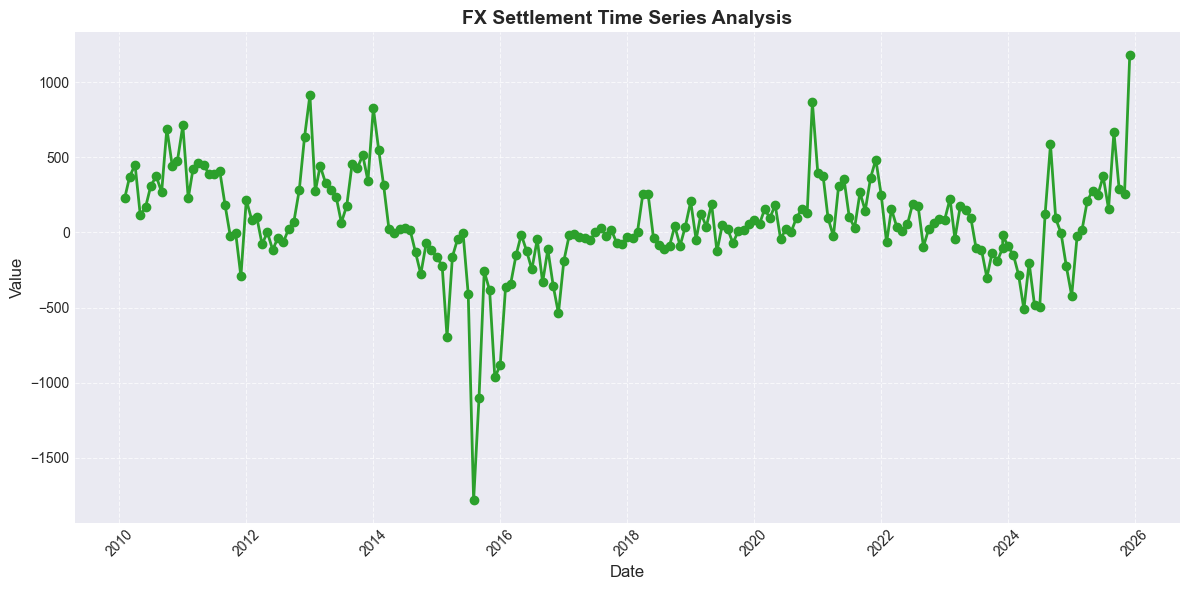

In [115]:

date_data = df.drop(columns=['Item', 'Label'])

# 2. Extract values for Index 22
index_22_values = date_data.loc[22].astype(float)

# 3. Extract values for Index 37 and calculate Month-on-Month (MoM) change
# .diff() calculates: current_month - previous_month
index_37_mom_change = date_data.loc[37].astype(float).diff()

# 4. Calculate the FX Settlement metric
# Formula: Index 22 + (Index 37 current - Index 37 previous)
fx_settlement_series = index_22_values + index_37_mom_change

# 5. Create the new main_df
main_df = pd.DataFrame({'FX Settlement': fx_settlement_series})

# Ensure the index is converted to datetime for a proper time-series plot
main_df.index = pd.to_datetime(main_df.index)

# 6. Visualization using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(main_df.index, main_df['FX Settlement'], marker='o', linestyle='-', color='#2ca02c', linewidth=2)

plt.title('FX Settlement Time Series Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [135]:
path = '/Users/ravelai/Downloads/Monthly_Average_Central_Parity_Historical_Data (1).xlsx'
central_df = pd.read_excel(path)
central_df = central_df[['Date', 'USD/CNY']]
central_df['USD/CNY'] = pd.to_numeric(central_df['USD/CNY'], errors='coerce')
central_df['Date'] = pd.to_datetime(central_df['Date'], errors='coerce')
central_df.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/5n/k0wzjvk50419v2zwrj58zh900000gn/T/ipykernel_6594/2606986635.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  central_df['Date'] = pd.to_datetime(central_df['Date'], errors='coerce')


,Date,USD/CNY
0,2026-01-01,7.0016
1,2025-12-01,7.0593
2,2025-11-01,7.0848
3,2025-10-01,7.0948
4,2025-09-01,7.1068


In [136]:
central_df['Upper'] = central_df['USD/CNY'] * 1.02
central_df['Lower'] = central_df['USD/CNY'] * 0.98
central_df.head()



,Date,USD/CNY,Upper,Lower
0,2026-01-01,7.0016,7.141632,6.861568
1,2025-12-01,7.0593,7.200486,6.918114
2,2025-11-01,7.0848,7.226496,6.943104
3,2025-10-01,7.0948,7.236696,6.952904
4,2025-09-01,7.1068,7.248936,6.964664


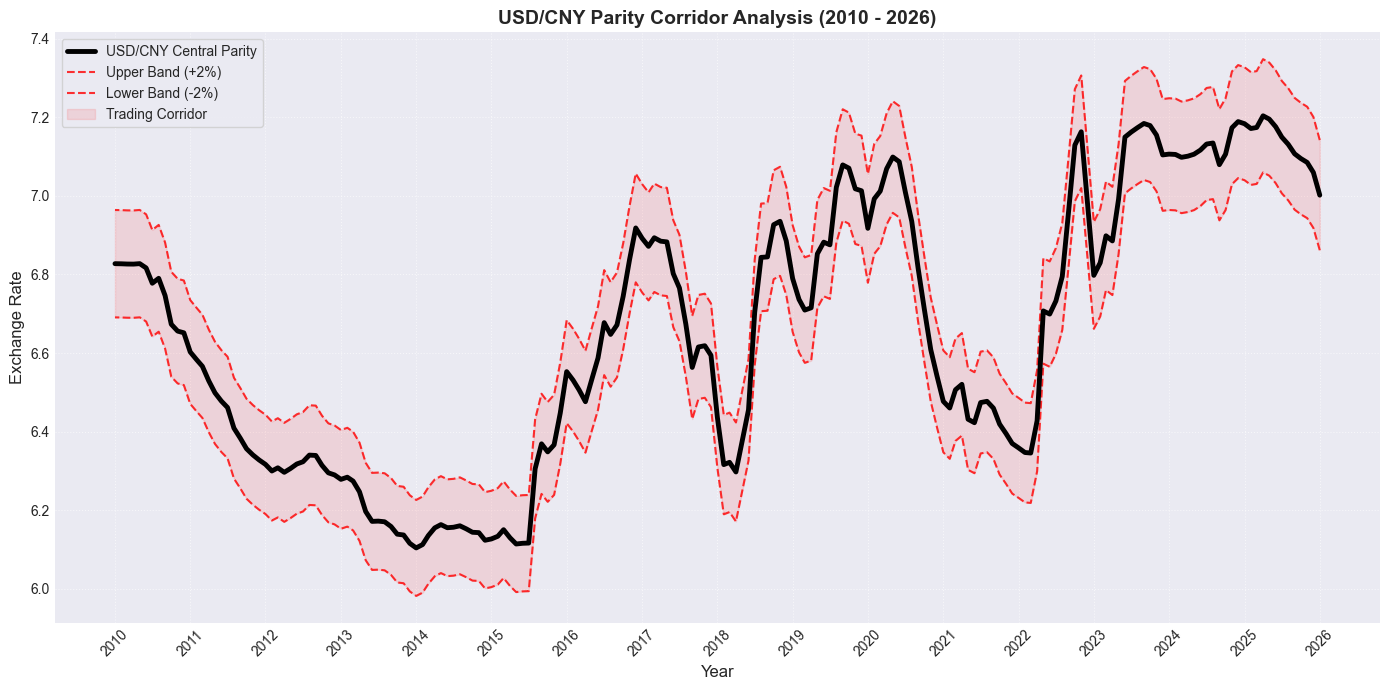

In [138]:

import matplotlib.dates as mdates
plt.figure(figsize=(14, 7))

# 2. Plot the core USD/CNY parity in thick bold black
plt.plot(central_df['Date'], central_df['USD/CNY'], 
         color='black', linewidth=3.5, label='USD/CNY Central Parity', zorder=3)

# 3. Plot Upper and Lower bands in red
plt.plot(central_df['Date'], central_df['Upper'], 
         color='red', linestyle='--', linewidth=1.5, label='Upper Band (+2%)', alpha=0.8)
plt.plot(central_df['Date'], central_df['Lower'], 
         color='red', linestyle='--', linewidth=1.5, label='Lower Band (-2%)', alpha=0.8)

# 4. Optional: Fill the corridor for better visual depth
plt.fill_between(central_df['Date'], central_df['Lower'], central_df['Upper'], 
                 color='red', alpha=0.1, label='Trading Corridor')

# 5. Strict Time Series Formatting
plt.title('USD/CNY Parity Corridor Analysis (2010 - 2026)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Exchange Rate', fontsize=12)

# Grid and Legend
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='upper left', frameon=True)

# Force X-axis to show years clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()